In [1]:
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('house_prices.csv')

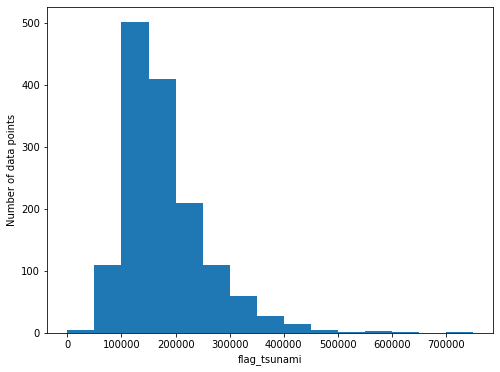

In [3]:
plt.figure(figsize=(8,6))

plt.hist(data.SalePrice, bins=range(0,800000,50000))

plt.ylabel('Number of data points')
plt.xlabel('flag_tsunami')
plt.show()

In [4]:
object_variables = data.select_dtypes(include=[np.object])
object_variables.nunique().sort_values()

Street            2
Alley             2
CentralAir        2
Utilities         2
LandSlope         3
PoolQC            3
PavedDrive        3
GarageFinish      3
BsmtQual          4
ExterQual         4
MasVnrType        4
KitchenQual       4
BsmtCond          4
BsmtExposure      4
Fence             4
MiscFeature       4
LandContour       4
LotShape          4
FireplaceQu       5
Electrical        5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
BldgType          5
ExterCond         5
BsmtFinType1      6
RoofStyle         6
GarageType        6
Foundation        6
Heating           6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [5]:
counts = data.HouseStyle.value_counts(dropna=False)
counts.reset_index().sort_values(by='index')

,index,HouseStyle
2,1.5Fin,154
5,1.5Unf,14
0,1Story,726
7,2.5Fin,8
6,2.5Unf,11
1,2Story,445
4,SFoyer,37
3,SLvl,65


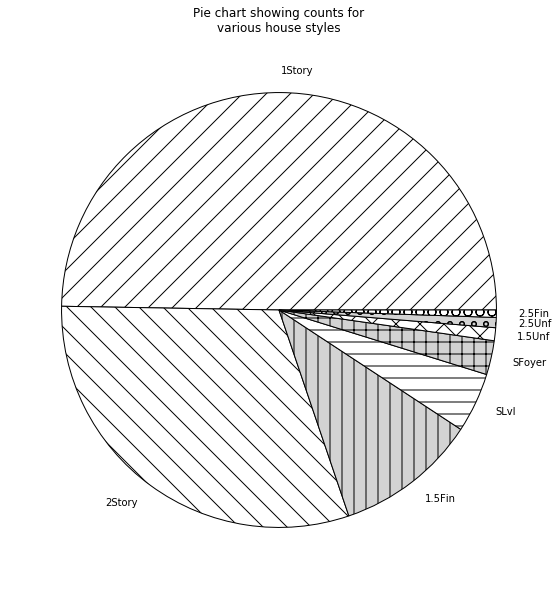

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
slices = ax.pie(counts, 
                labels = counts.index, 
                colors = ['white'], 
               wedgeprops = {'edgecolor': 'black'} )
patches = slices[0]
hatches =  ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '\.', '*']
colors = ['white', 'white', 'lightgrey', 'white', 
          'lightgrey', 'white', 'lightgrey', 'white']
for patch in range(len(patches)):
    patches[patch].set_hatch(hatches[patch])
    patches[patch].set_facecolor(colors[patch])
plt.title('Pie chart showing counts for\nvarious house styles')
plt.show()

In [7]:
numeric_variables = data.select_dtypes(include=[np.number]) 
numeric_variables.nunique().sort_values(ascending=False) 

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
MSSubClass         15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
OverallCond         9
PoolArea            8
BedroomAbvGr        8
YrSold              5
GarageCars          5
KitchenAbvGr        4
Fireplaces          4
BsmtFullBath        4
FullBath            4
HalfBath            3
BsmtHalfBath        3
dtype: int64

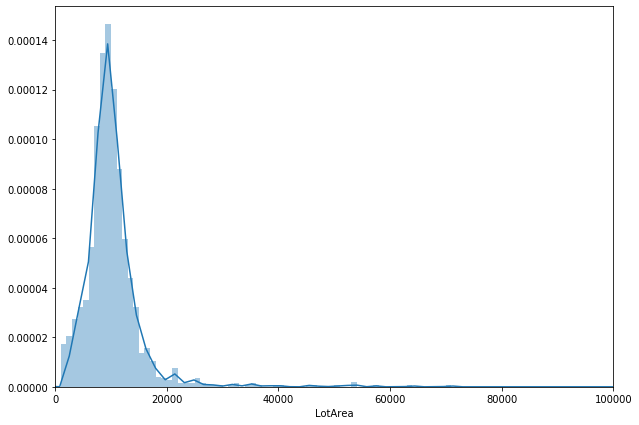

In [8]:
plt.figure(figsize=(10,7))
sns.distplot(data.LotArea.dropna(), bins=range(0,100000,1000))
plt.xlim(0,100000)
plt.show()

In [9]:
data.skew().sort_values()

GarageYrBlt      -0.649415
YearBuilt        -0.613461
YearRemodAdd     -0.503562
GarageCars       -0.342549
Id                0.000000
FullBath          0.036562
YrSold            0.096269
GarageArea        0.179981
BedroomAbvGr      0.211790
MoSold            0.212053
OverallQual       0.216944
BsmtFullBath      0.596067
Fireplaces        0.649565
HalfBath          0.675897
TotRmsAbvGrd      0.676341
OverallCond       0.693067
2ndFlrSF          0.813030
BsmtUnfSF         0.920268
GrLivArea         1.366560
1stFlrSF          1.376757
MSSubClass        1.407657
TotalBsmtSF       1.524255
WoodDeckSF        1.541376
BsmtFinSF1        1.685503
SalePrice         1.882876
LotFrontage       2.163569
OpenPorchSF       2.364342
MasVnrArea        2.669084
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
M

In [10]:
data.kurt()

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0